In [1]:
import os
import generate_features
import polars as pl

input_dir = "./output_clips"
fnames = os.listdir(input_dir)
df = pl.DataFrame()
for fname in fnames:
    input_file = os.path.join(input_dir, fname)
    ext = fname.split(".")[-1]
    is_json = ext == "json"
    out_df = generate_features.main(input_file, is_json)
    df = df.vstack(out_df)


from sklearn.preprocessing import StandardScaler

print(df)
df.write_csv("input_df.csv")
scaler = StandardScaler()
name_df = df.clone()
df = df.select(
    pl.exclude("name")
)
df = pl.DataFrame(scaler.fit_transform(df))
data = df.to_numpy()
print(df)
print(df.std())
print(df.mean())

# weight
# df = df.with_columns(
#     column_74 = pl.col("column_74") * 3,
#     column_75 = pl.col("column_75") * 3,
# )

print(df)
print(df.std())
print(df.mean())


shape: (99, 77)
┌──────────┬──────────┬──────────┬──────────┬───┬──────────┬──────────┬────────────┬───────────────┐
│ f1_min   ┆ f1_max   ┆ f1_std   ┆ f1_mean  ┆ … ┆ f19_max  ┆ f19_std  ┆ f19_mean   ┆ name          │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---      ┆ ---      ┆ ---        ┆ ---           │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆   ┆ f64      ┆ f64      ┆ f64        ┆ str           │
╞══════════╪══════════╪══════════╪══════════╪═══╪══════════╪══════════╪════════════╪═══════════════╡
│ 0.799281 ┆ 1.007484 ┆ 0.073116 ┆ 0.932172 ┆ … ┆ 0.001576 ┆ 0.000177 ┆ 1.8636e-8  ┆ dance_data_60 │
│          ┆          ┆          ┆          ┆   ┆          ┆          ┆            ┆ _corrected    │
│ 0.992883 ┆ 0.997509 ┆ 0.001072 ┆ 0.994284 ┆ … ┆ 0.000068 ┆ 0.000011 ┆ -1.8950e-7 ┆ dance_data_75 │
│          ┆          ┆          ┆          ┆   ┆          ┆          ┆            ┆ _corrected    │
│ 0.860762 ┆ 0.988121 ┆ 0.038375 ┆ 0.944305 ┆ … ┆ 0.00117  ┆ 0.000213 ┆ -5.

In [2]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(data) 

[[1.00000000e+01 1.70000000e+01 0.00000000e+00 2.00000000e+00]
 [4.10000000e+01 9.90000000e+01 0.00000000e+00 3.00000000e+00]
 [4.20000000e+01 4.80000000e+01 1.53970623e-01 2.00000000e+00]
 [1.00000000e+00 1.01000000e+02 1.79361059e-01 3.00000000e+00]
 [3.00000000e+01 1.02000000e+02 2.21373288e-01 4.00000000e+00]
 [3.20000000e+01 1.03000000e+02 3.86980209e-01 5.00000000e+00]
 [5.00000000e+00 2.60000000e+01 4.05930340e-01 2.00000000e+00]
 [1.04000000e+02 1.05000000e+02 9.53875887e-01 7.00000000e+00]
 [2.30000000e+01 5.00000000e+01 1.42756376e+00 2.00000000e+00]
 [3.60000000e+01 4.00000000e+01 1.54079016e+00 2.00000000e+00]
 [8.90000000e+01 9.60000000e+01 1.79670773e+00 2.00000000e+00]
 [2.40000000e+01 3.10000000e+01 2.12770516e+00 2.00000000e+00]
 [5.10000000e+01 6.80000000e+01 2.24901310e+00 2.00000000e+00]
 [7.90000000e+01 8.20000000e+01 2.35084079e+00 2.00000000e+00]
 [8.80000000e+01 1.09000000e+02 2.76753935e+00 3.00000000e+00]
 [6.20000000e+01 7.10000000e+01 2.78512345e+00 2.000000

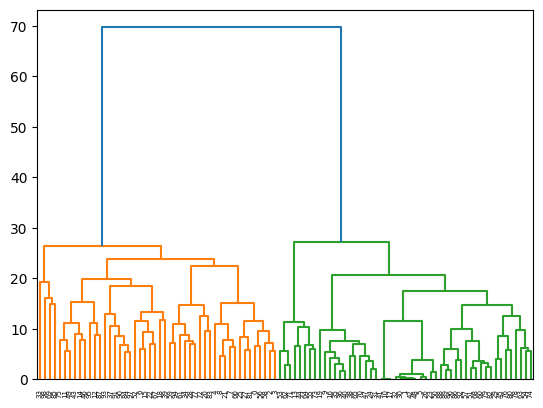

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# display with scipy
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
print(linkage_data)
plt.show()

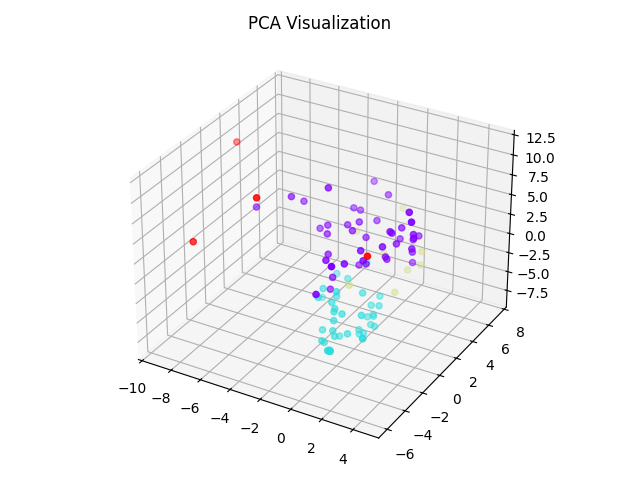

In [4]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
cluster_dict = {"cluster": labels}
out_df = name_df.hstack(pl.from_dict(cluster_dict))
out_df = out_df.select(
    pl.col("name"),
    pl.col("cluster"),
).sort(pl.col("cluster"), pl.col("name"))
out_df.write_csv("clustering_output.csv")

from sklearn.decomposition import PCA

n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data) 

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca[:, 2], X_pca[:, 1], X_pca[:, 0], c=labels, cmap=plt.cm.rainbow)
plt.title("PCA Visualization")
plt.tight_layout()
plt.show()